In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_games_extended.csv")

features = [
    "price",
    "ratings_count",
    "has_great_soundtrack",
    "has_story_rich",
    "has_atmospheric",
    "is_free"
]

target = "metacritic_score"

ml_df = df[features + [target]].dropna()

ml_df.head()

,price,ratings_count,has_great_soundtrack,has_story_rich,has_atmospheric,is_free,metacritic_score
0,299.0,7088,1,1,1,False,93.0
1,6247.0,5399,1,1,1,False,93.0
5,8760.0,5080,0,1,1,False,93.0
6,799.0,3395,1,1,1,False,84.0
7,2799.0,2929,1,1,1,False,86.0


In [3]:
X = ml_df[features]
y = ml_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

In [6]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.14803546948958546
RMSE: 6.209281432925716


In [7]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
1,ratings_count,1.904985
3,has_story_rich,1.235952
0,price,0.117489
5,is_free,0.000000
2,has_great_soundtrack,-0.071560
4,has_atmospheric,-1.850345


In [8]:
ml_df["high_score"] = (ml_df["metacritic_score"] >= 75).astype(int)

X = ml_df[features]
y = ml_df["high_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8846153846153846
Precision: 0.8846153846153846
Recall: 1.0
F1 Score: 0.9387755102040817

Confusion Matrix:
[[ 0  3]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.88      1.00      0.94        23

    accuracy                           0.88        26
   macro avg       0.44      0.50      0.47        26
weighted avg       0.78      0.88      0.83        26



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
df = pd.read_csv("final_games_extended.csv")

df["price_numeric"] = pd.to_numeric(df["price"], errors="coerce")


df.loc[df["is_free"] == True, "price_numeric"] = 0

features = [
    "rating",
    "ratings_count",
    "metacritic_score",
    "price_numeric",
    "has_story_rich",
    "has_atmospheric"
]

target = "has_great_soundtrack"

df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Macro F1 Score:", f1_score(y_test, y_pred, average="macro"))

Confusion Matrix:
[[10  4]
 [ 5 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.79      0.75      0.77        20

    accuracy                           0.74        34
   macro avg       0.73      0.73      0.73        34
weighted avg       0.74      0.74      0.74        34

Macro F1 Score: 0.7294429708222812


In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.64      0.70      0.67        20

    accuracy                           0.59        34
   macro avg       0.57      0.56      0.56        34
weighted avg       0.58      0.59      0.58        34

Macro F1: 0.5641025641025641


In [13]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

y_pred_custom = (y_prob >= 0.45).astype(int)

print(classification_report(y_test, y_pred_custom))
print("Macro F1:", f1_score(y_test, y_pred_custom, average="macro"))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.75      0.75      0.75        20

    accuracy                           0.71        34
   macro avg       0.70      0.70      0.70        34
weighted avg       0.71      0.71      0.71        34

Macro F1: 0.6964285714285714


In [14]:
#evaluation for final model
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Macro F1 Score:", f1_score(y_test, y_pred, average="macro"))
print("Log Loss:", log_loss(y_test, y_prob))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[10  4]
 [ 5 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.79      0.75      0.77        20

    accuracy                           0.74        34
   macro avg       0.73      0.73      0.73        34
weighted avg       0.74      0.74      0.74        34

Macro F1 Score: 0.7294429708222812
Log Loss: 0.6291759794888485
ROC-AUC Score: 0.6821428571428572


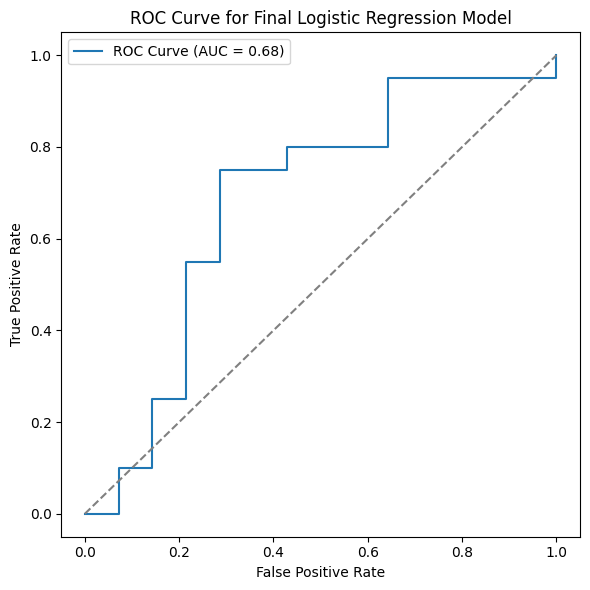

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Final Logistic Regression Model")
plt.legend()
plt.tight_layout()
plt.show()